# Processamento de Linguagem Natural usando Aprendizado de Máquina

<div style='float:right;'>
<h3>Daniel Junior</h3>
<h4>PPG - IC/UFF</h4>
</div>

## Introdução

A área de pesquisa em <i>Natural Language Processing</i> surgiu da interseção de áreas como Inteligência Artificial e Linguística.
Até o momento, os pesquisadores dessa área precisam ser multi-disciplinares.

Uma primeira abordagem para os problemas de NLP, foi utilizar os resultados obtidos em Análise de Gramáticas de Linguagens, como os obtidos por Chomsky's.

## Introdução

<p>Porém, o uso dessas técnicas se torna proibitivo, uma vez que necessitam de especificação de regras de forma manual.</p> 
<p>Ainda considerando, por exemplo, os diversos idiomas e regras sintáticas e semânticas associadas, é inviável escalar utilizando somente este tipo de abordagem.</p>


## Sub-problemas em NLP 

<p>Os problemas mais comuns tratados (Totalmente ou parcialmente) por NLP são listados a seguir:</p>

<ul>
<li><strong>Detecção de limites de sentenças <i>(Sentence boundary detection)</i></strong></li>
<li><strong>Tokenização</strong></li>
<li><strong>Reconhecimento de entidades nomeadas <i>(Named entity recognition)</i></strong></li>
<li><strong>Desambiguação de sentido das palavras <i>(WSD)</i></strong></li>
<li><strong>Extração de Relacionamentos</strong></li>
<li><strong>Extração de Informação</strong></li>

</ul>

## Aprendizado de Máquina em NLP

<p>Como dito anteriormente, utilizar uma abordagem puramente baseada em gramáticas é inviável devido a necessidade de se especificar regras manualmente, e que podem mudar drasticamente dependendo do contexto.</p>
<p>Porém, pode-se lançar mão da imensa massa de dados que é gerada todo o tempo para automatizar a execução de tarefas realizadas pelo NLP.</p>
<p>A fim de comprovar a aplicabilidade do Aprendizado de Máquina na área de NLP, tomamos como base o problema de <i>Desambiguação de sentido das palavras</i> (WSD).</p>


<h2><i>Word Sense Disambiguation</i></h2>

<p>Uma mesma palavra pode ter diferentes significados, dependendo do contexto no qual esteja inserido.</p>
<p>Por exemplo, a palavra <i>line</i> em inglês, pode ter o sentido de: <i>cordão</i>, <i>divisão</i>, <i>formação</i>, <i>telefone</i>, <i>produção</i> e <i>textual</i>.  </p>


## WSD
<p>Sendo assim, um problema de WSD consiste em:</p>
<ul>
<li>Dado uma palavra em um contexto.</li>
<li>Decidir entre um conjunto, pré-especificado e finito de rótulos, qual o sentido real da palavra.</li>
<ul>

## Usando Aprendizado de Máquina para o problema de WSD

<p>A tarefa de WSD pode ser transformada em um problema de Classificação em Aprendizado de Máquina.</p>
<p>Mas até que seja possível, aplicar métodos de Aprendizado de Máquina em WSD, alguns passos intermediários são necessários.</p>

Os dados de entrada em NLP, são voz ou texto. No entanto, os métodos de Classificação em Aprendizado de Máquina estão baseados em um dataset que contém <i>features</i>.

## Usando Aprendizado de Máquina para o problema de WSD

<p>Com isso se torna necessário extrair vetores de <i>features</i> do texto.</p>
<p>Em WSD, utiliza-se usualmente dois tipos de <i>features:</i></p>
<ul>
<li>
    <strong>Collocational:</strong> 
    Features que contém informação de localização com respeito a palavra objeto de WSD.
</li>
<li>
    <strong>Bag-of-words:</strong>
    Features que ocorrem em qualquer lugar no texto que foi extraído.
</li>
</ul>

## Aprendizado em WSD na Prática
<h3>Estudo de caso: <i>line</i> </h3>

Dataset escolhido já foi pré-processado e possui <i>collocational features</i>.
<p>Veja a descrição do dataset <a href="data/wsd.pdf">aqui</a></p>

### Carregando os dados

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
from IPython.display import display, HTML
import pydotplus

In [160]:
data = pd.read_csv("data/wsd.development.csv", delim_whitespace=True)
#Features
print("Features: ", data.columns.values)

#empirical probability
print("\n Probabilidades a priori de cada sentido, a partir de todo dataset de treinamento:")
print((data['SENSE'].value_counts().to_frame() / data.count() * 100)['SENSE'])

Features:  ['SENSE' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12'
 'A13' 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20']

 Probabilidades a priori de cada sentido, a partir de todo dataset de treinamento:
product      52.156640
phone        10.783201
text          9.988649
cord          9.534620
division      9.137344
formation     8.399546
Name: SENSE, dtype: float64


### Separando os dados de desenvolvimento em treinamento e teste

Seleciono apenas as features de A1 à A11, pois os demais precisariam de uma codificação de atributos categóricos para númericos, o que não faz parte do objetivo desta apresentação. Para mais informações veja <i><a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html">Pandas.get_dummies</a></i> e <i><a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Label Encoder</a></i>.

In [161]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

X_train = train.ix[:, 1:12] 
y_train = train['SENSE']


X_test = test.ix[:, 1:12]
y_test = test['SENSE']

### Treinando o modelo
Para esta demonstração vamos usar o classificador baseado em Árvores de Decisão.

In [162]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
test_score = dt.score(X_test, y_test) * 100
print("Score do teste: ", full_train_score, "%")

Score do teste:  64.4024075666 %


### Validação cruzada do modelo

In [163]:
acc_scores = []
skf = StratifiedKFold(n_splits=10)
for train_idx, test_idx in skf.split(X_train, y_train):
    X_fold = X_train.values[train_idx]
    y_fold = y_train.values[train_idx]
    dt.fit(X_fold,y_fold)
    y_pred = dt.predict(X_train.values[test_idx])
    acc_scores.append(accuracy_score(y_train.values[test_idx], y_pred))

acc_mean = np.array(acc_scores).mean()
acc_deviation = np.array(acc_scores).std()


In [164]:
df = pd.DataFrame()
df['Acurácia Média de Validação']= [acc_mean * 100]
df['Desvio Padrão da Acurácia de Validação']= [acc_deviation * 100]
df['Acurácia no conjunto de teste']= [test_score]

### Avaliação dos resultados de treinamento e teste

In [165]:
display(df)

,Acurácia Média de Validação,Desvio Padrão da Acurácia de Validação,Acurácia no conjunto de teste
0,66.797977,2.292335,64.402408


### Exibição da Árvore Decisão gerada sobre o conjunto de treinamento

In [166]:
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=data.columns.values,  
                         class_names=data['SENSE'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

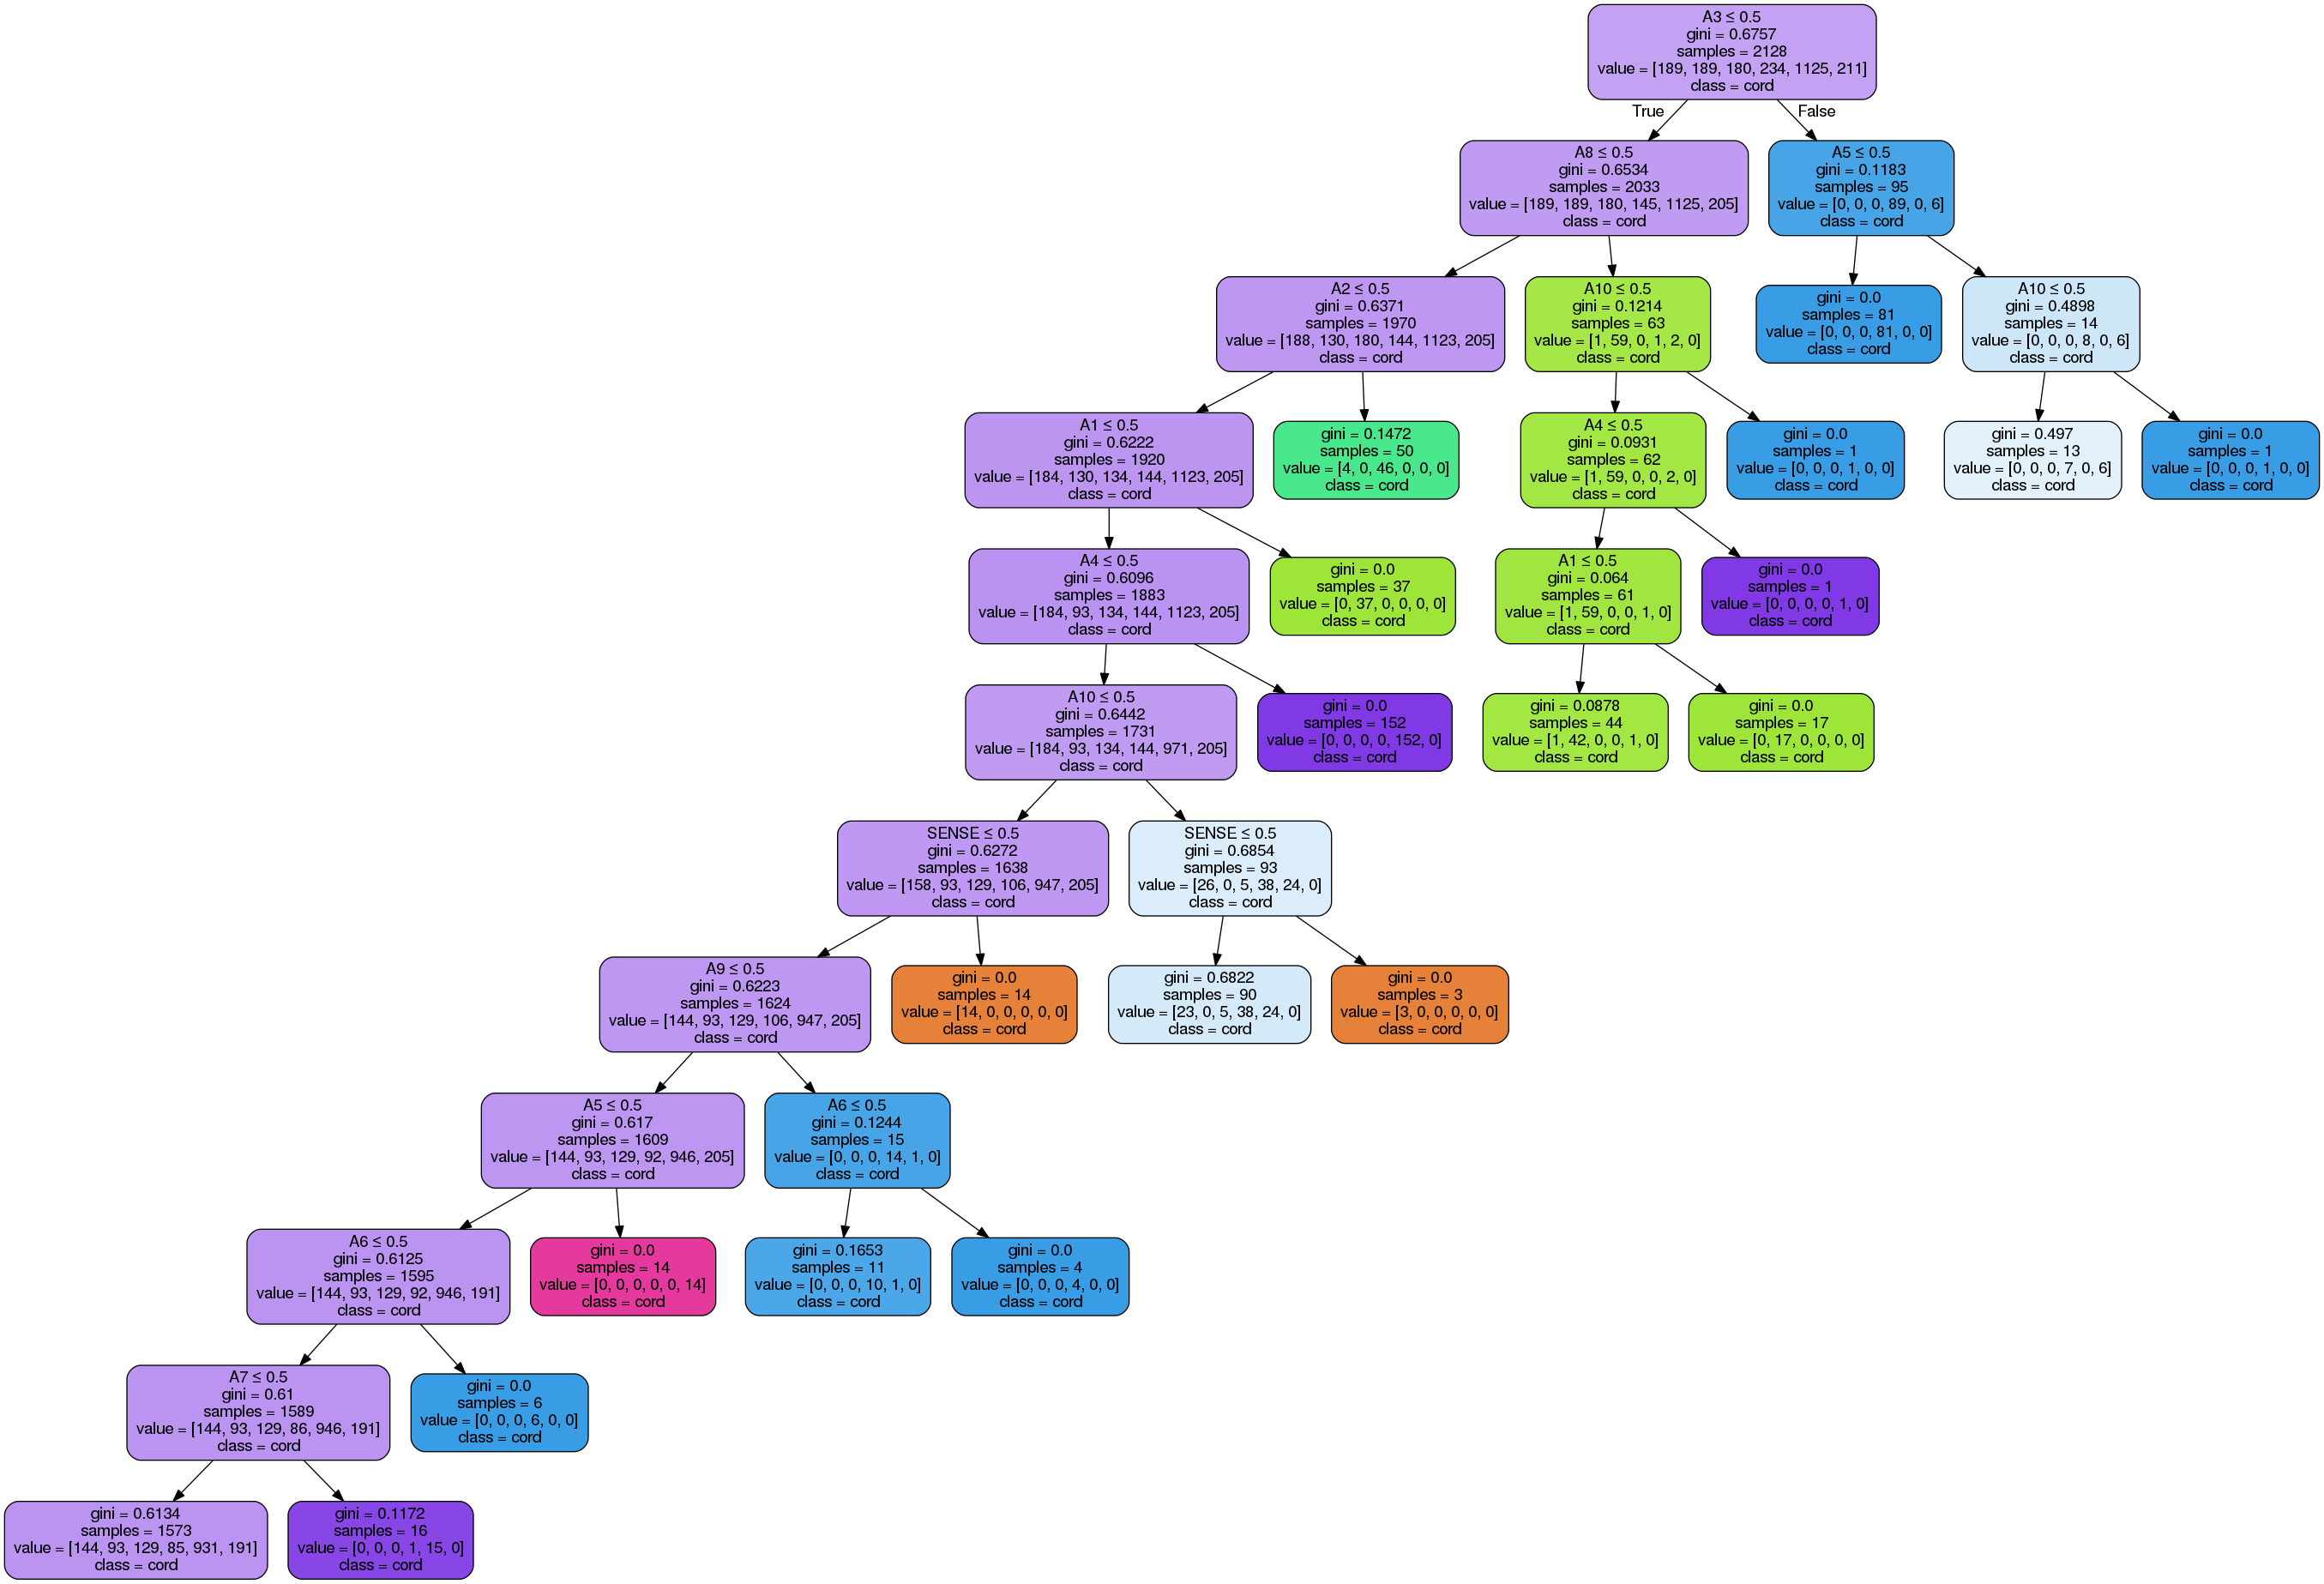

In [167]:
Image(graph.create_png()) 

## Conclusão
Foi possível notar que o Aprendizado de Máquina aumenta muito o poder de solução de problemas com uma abordagem diferente da tradicional.<hr/>
A grande dificuldade para se utilizar os métodos de Aprendizado de Máquina no problema de WSD, é a extração de features.

### Referências
<ul>
<li><a href="https://ufal.mff.cuni.cz/Machine-Learning-for-NLP">A Gentle Introduction to Machine Learning for Natural Language Processing</a></li>
<li><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3168328/">Natural language processing: an introduction</a></li>
<li><a href="https://web.stanford.edu/~jurafsky/slp3/slides/Chapter18.wsd.pdf">Word Sense Disambiguation</a></li>
</ul>